# Fraud Detection Project
- Presented by
Mukhtadir Syed

![convert notebook to web app](https://miro.medium.com/max/1400/1*M2dT90tDTwIYTQcNPkcmvg.jpeg)


# Sections
* [1. Importing all the required libraries](#1)
* [2. Downloading the Dataset](#2)
* [3. EDA & Data Cleaning](#3)
    * [3.1 Imputing the test set (train has no missing values)](#3.1)
    * [3.2 Matching dtypes of all columns for train and test](#3.2)
* [4. Preparing Train and Test datasets](#4)
* [5. Preparing Synthetic Entries onto the Train set](#5)
* [6. Final preprocessing using Column Transformations](#6)
* [7. Modeling](#7)
    * [7.1 Model Evaluation](#7.1)
    * [7.2 Feature Importance](#7.2)
* [8. Submission](#8)
* [9. Other Models & Techniques](#9)
    * [9.1 XGBoost with Randomised Search CV](#9.1)
    * [9.2 XGBoost with Hyperopt (Bayesian Optimisation of Hyper parameters)](#9.2)
    * [9.3 Genetic Algorithm TPOT](#9.3)
* [10. Conclusion & Learnings](#10)


# 1. Importing all the required libraries <a name=1></a>

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from __future__ import print_function
import warnings
import xgboost as xgb
import missingno as msno
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


# 2. Downloading the dataset <a name=2></a>

In [94]:
print ("IMPORTING LIBRARIES...")
import pandas as pd


print ("LOADING DATASETS...")
try: # reading train csv from local file
    df_train = pd.read_csv("mfalonso__6aQ6IxU7Va__train.csv")
    df_train.head()
except: # reading train csv from the internet if it is the first time
    import urllib
    csv_train = urllib.request.urlopen("http://manoelutad.pythonanywhere.com/static/uploads/mfalonso__6aQ6IxU7Va__train.csv")
    csv_train_content = csv_train.read()
    with open("mfalonso__6aQ6IxU7Va__train.csv", 'wb') as f:
            f.write(csv_train_content)
    df_train = pd.read_csv("mfalonso__6aQ6IxU7Va__train.csv")

    
try: # reading test csv from local file
    df_test = pd.read_csv("mfalonso__6aQ6IxU7Va__test.csv")
    df_test.head()
except: # reading test csv from the internet if it is the first time
    import urllib
    csv_test = urllib.request.urlopen("http://manoelutad.pythonanywhere.com/static/uploads/mfalonso__6aQ6IxU7Va__test.csv")
    csv_test_content = csv_test.read()
    with open("mfalonso__6aQ6IxU7Va__test.csv", 'wb') as f:
            f.write(csv_test_content)
    df_test = pd.read_csv("mfalonso__6aQ6IxU7Va__test.csv")

IMPORTING LIBRARIES...
LOADING DATASETS...


# 3. EDA & Data Cleaning <a name=3></a>

In [ ]:
#Generated Pandas profile report, this is heavy to run
#profile = ProfileReport(df_train, title="Pandas Profiling Report")
#profile.to_file("profile.html")

In [95]:
df_train.columns

Index(['Unnamed: 0', 'id', 'ib_var_1', 'ib_var_2', 'ib_var_3', 'ib_var_4',
       'ib_var_5', 'ib_var_6', 'ib_var_7', 'ib_var_8', 'ib_var_9', 'ib_var_10',
       'ib_var_11', 'ib_var_12', 'ib_var_13', 'ib_var_14', 'ib_var_15',
       'ib_var_16', 'ib_var_17', 'ib_var_18', 'ib_var_19', 'ib_var_20',
       'ib_var_21', 'icn_var_22', 'icn_var_23', 'icn_var_24', 'ico_var_25',
       'ico_var_26', 'ico_var_27', 'ico_var_28', 'ico_var_29', 'ico_var_30',
       'ico_var_31', 'ico_var_32', 'ico_var_33', 'ico_var_34', 'ico_var_35',
       'ico_var_36', 'ico_var_37', 'ico_var_38', 'ico_var_39', 'ico_var_40',
       'ico_var_41', 'ico_var_42', 'ico_var_43', 'ico_var_44', 'ico_var_45',
       'ico_var_46', 'ico_var_47', 'ico_var_48', 'ico_var_49', 'ico_var_50',
       'ico_var_51', 'ico_var_52', 'ico_var_53', 'ico_var_54', 'ico_var_55',
       'ico_var_56', 'ico_var_57', 'ico_var_58', 'ico_var_59', 'ico_var_60',
       'ico_var_61', 'ico_var_62', 'ico_var_63', 'ico_var_64', 'if_var_65',
       'if

In [96]:
df_train.shape, df_test.shape # the test set is much bigger than train

((864, 84), (2967, 84))

In [97]:
df_train.describe()

,Unnamed: 0,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,ib_var_9,ib_var_10,ib_var_11,ib_var_12,ib_var_13,ib_var_14,ib_var_15,ib_var_16,ib_var_17,ib_var_18,ib_var_19,ib_var_20,ib_var_21,icn_var_22,icn_var_23,icn_var_24,ico_var_25,ico_var_26,ico_var_27,ico_var_28,ico_var_29,ico_var_30,ico_var_31,ico_var_32,ico_var_33,ico_var_34,ico_var_35,ico_var_36,ico_var_37,ico_var_38,ico_var_39,ico_var_40,ico_var_41,ico_var_42,ico_var_43,ico_var_44,ico_var_45,ico_var_46,ico_var_47,ico_var_48,ico_var_49,ico_var_50,ico_var_51,ico_var_52,ico_var_53,ico_var_54,ico_var_55,ico_var_56,ico_var_57,ico_var_58,ico_var_59,ico_var_60,ico_var_61,ico_var_62,ico_var_63,ico_var_64,if_var_65,if_var_66,if_var_67,if_var_68,if_var_69,if_var_70,if_var_71,if_var_72,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81,ob_target
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.0,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,431.500000,432.500000,0.085648,0.581019,0.010417,0.194444,0.721065,0.732639,0.019676,0.053241,0.002315,0.001157,0.079861,1.0,0.203704,0.518519,0.895833,0.873843,0.930556,0.275463,0.937500,0.837963,0.657407,2.247685,1.355324,1.509259,4.013889,4.079861,3.964120,4.017361,3.857639,3.946759,3.821759,3.951389,5.495370,10.395833,15.928241,7.466435,3.270833,2.866898,2.781250,2.802083,2.843750,2.923611,4.023148,4.049769,2.406250,4.149306,2.851852,3.284722,1.884259,1.920139,2.315972,3.083333,2.225694,3.121528,2.162037,2.273148,2.231481,3.099537,2.226852,2.118056,2.193287,3.039352,2.333333,1.918981,38.409722,99.814815,8.914352,2244.683796,8060.468592,1.418981,3.304398,3.862269,0.791319,0.758102,9.422454,8.326389,0.582948,9.780569,4229.071769,0.692168,2.347222,0.101852
std,249.559612,249.559612,0.280006,0.493678,0.101588,0.396002,0.448735,0.442839,0.138965,0.224643,0.048085,0.034021,0.271235,0.0,0.402984,0.499946,0.305654,0.332219,0.254356,0.447006,0.242202,0.368698,0.474851,0.637742,1.071010,0.718830,0.713902,0.716863,0.682413,0.770802,0.737577,0.759300,0.779630,0.712379,5.264277,3.718144,6.066410,5.466958,0.992804,0.978147,1.041245,0.942837,1.027945,1.017209,0.721734,0.757244,0.847877,0.754853,1.095147,1.112428,0.766042,0.700513,0.882913,1.009801,0.778469,1.037110,0.784640,0.864879,0.897856,0.997935,0.809515,0.753484,0.758666,1.012473,0.850329,0.741369,8.677094,3.965432,6.499636,2333.457953,8553.489952,1.153527,1.892518,1.990886,0.103417,1.445993,4.013420,4.208081,0.134314,7.925068,2976.357954,0.092525,1.240413,0.302629
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,102.800000,1.079400,1.000000,1.000000,1.0000

In [98]:
df_test.describe()

,Unnamed: 0,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,ib_var_9,ib_var_10,ib_var_11,ib_var_12,ib_var_13,ib_var_14,ib_var_15,ib_var_16,ib_var_17,ib_var_18,ib_var_19,ib_var_20,ib_var_21,icn_var_22,icn_var_23,icn_var_24,ico_var_25,ico_var_26,ico_var_27,ico_var_28,ico_var_29,ico_var_30,ico_var_31,ico_var_32,ico_var_33,ico_var_34,ico_var_35,ico_var_36,ico_var_37,ico_var_38,ico_var_39,ico_var_40,ico_var_41,ico_var_42,ico_var_43,ico_var_44,ico_var_45,ico_var_46,ico_var_47,ico_var_48,ico_var_49,ico_var_50,ico_var_51,ico_var_52,ico_var_53,ico_var_54,ico_var_55,ico_var_56,ico_var_57,ico_var_58,ico_var_59,ico_var_60,ico_var_61,ico_var_62,ico_var_63,ico_var_64,if_var_65,if_var_66,if_var_67,if_var_68,if_var_69,if_var_70,if_var_71,if_var_72,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81
count,2967.00000,2967.00000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.0,2967.000000,2967.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2895.000000,2967.000000,2947.000000,2967.000000,2966.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2966.000000,2967.000000,2967.000000,2967.000000,2966.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2952.000000,2967.000000,2967.000000,2967.000000
mean,1483.00000,1484.00000,0.071116,0.578025,0.014493,0.194135,0.728345,0.721604,0.017863,0.055949,0.002359,0.000674,0.088642,1.0,0.173239,0.559151,0.912340,0.881659,0.921443,0.371544,0.944032,0.848281,0.558328,2.230052,1.315807,1.534102,3.999326,4.060013,3.933940,3.985507,3.843276,3.904954,3.772497,3.908662,5.253540,10.313448,15.955511,5.655544,3.200607,2.778564,2.718234,2.743512,2.771149,2.859454,3.980789,4.045838,2.354230,4.138861,2.792383,3.194810,1.903606,1.962588,2.297944,2.921132,2.257836,3.079205,2.224806,2.306707,2.200539,2.976744,2.276373,2.126727,2.195821,2.881025,2.326255,1.950792,38.665993,99.764071,8.657904,2078.330839,8184.556476,1.391304,3.134816,3.618470,0.785197,0.773316,9.523246,8.639276,0.569051,9.733613,4000.861479,0.683564,2.329626
std,856.64345,856.64345,0.257061,0.493958,0.119530,0.395600,0.444888,0.448285,0.132476,0.229862,0.048523,0.025959,0.284274,0.0,0.378518,0.496573,0.282848,0.323066,0.269091,0.483299,0.229898,0.358809,0.496670,0.627295,0.994097,0.717666,0.706391,0.703956,0.687292,0.745944,0.730356,0.764872,0.796028,0.714045,5.107523,3.785753,6.100367,4.965083,1.035563,0.970488,1.047497,0.978152,1.033102,1.035837,0.701098,0.749863,0.842784,0.727735,1.081960,1.160342,0.714089,0.704682,0.845163,1.020284,0.781563,1.059966,0.792551,0.859067,0.861180,1.014626,0.789636,0.757153,0.740694,1.012232,0.851832,0.717477,8.629404,4.682605,6.268540,2323.374403,8957.628211,1.366033,1.852999,1.977632,0.100381,1.463736,4.065678,4.278704,0.140834,8.385167,2746.321744,0.094977,1.240694
min,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,0.000000,87.300

In [99]:
df_train_miss = pd.DataFrame(df_train.isna().sum(), columns=['Count of Missing'])

if df_train_miss['Count of Missing'].sum() == 0:
    print ("The Train set has no missing values, please check for test set")
else:
    df_train_miss[df_train_miss['Count of Missing'] > 0]



The Train set has no missing values, please check for test set


The Test Set has missing values, we will need to impute these values


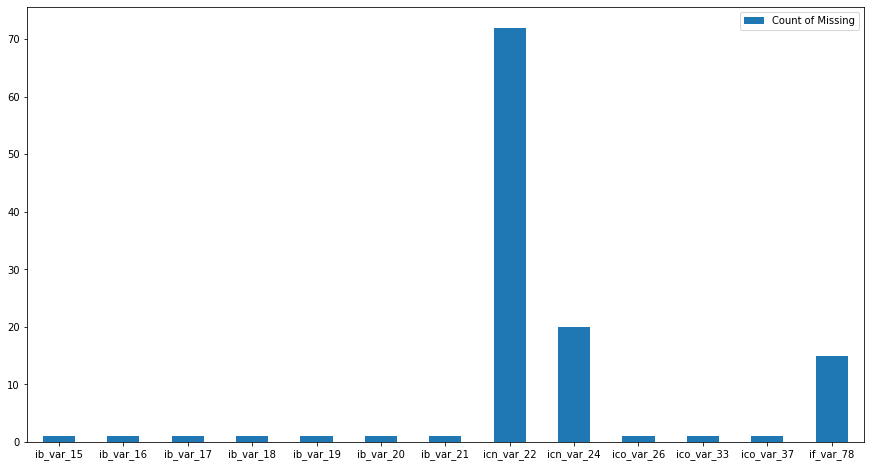

In [100]:
df_test_miss = pd.DataFrame(df_test.isna().sum(), columns=['Count of Missing'])

if df_test_miss['Count of Missing'].sum() == 0:
    print ("The Test set has no missing values, we can move ahead")
else:
    print("The Test Set has missing values, we will need to impute these values")
    df_test_miss[df_test_miss['Count of Missing']>0].plot.bar(figsize=(15,8))
    plt.xticks(rotation='horizontal')
    plt.show();

In [101]:
df_train.ob_target.value_counts() # checing for class balance

0    776
1     88
Name: ob_target, dtype: int64

In [102]:
df_train.ib_var_12.value_counts() #this column is all 1s, we will drop it later, the model will not learn anything from it



1    864
Name: ib_var_12, dtype: int64

In [103]:
df_train.ib_var_10.value_counts() #same as above, there is just a single 1 here and it is not a fraud example, we will drop the column


0    863
1      1
Name: ib_var_10, dtype: int64

In [104]:
df_train[df_train['ib_var_10']==1] #this example is not fraud

,Unnamed: 0,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,ib_var_9,ib_var_10,ib_var_11,ib_var_12,ib_var_13,ib_var_14,ib_var_15,ib_var_16,ib_var_17,ib_var_18,ib_var_19,ib_var_20,ib_var_21,icn_var_22,icn_var_23,icn_var_24,ico_var_25,ico_var_26,ico_var_27,ico_var_28,ico_var_29,ico_var_30,ico_var_31,ico_var_32,ico_var_33,ico_var_34,ico_var_35,ico_var_36,ico_var_37,ico_var_38,ico_var_39,ico_var_40,ico_var_41,ico_var_42,ico_var_43,ico_var_44,ico_var_45,ico_var_46,ico_var_47,ico_var_48,ico_var_49,ico_var_50,ico_var_51,ico_var_52,ico_var_53,ico_var_54,ico_var_55,ico_var_56,ico_var_57,ico_var_58,ico_var_59,ico_var_60,ico_var_61,ico_var_62,ico_var_63,ico_var_64,if_var_65,if_var_66,if_var_67,if_var_68,if_var_69,if_var_70,if_var_71,if_var_72,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81,ob_target
547,547,548,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,1,2,1,1,3,4,3,3,3,4,4,4,1,9,19,3,4,2,4,4,4,4,3,5,3,5,4,4,2,2,2,4,2,3,2,2,2,4,2,2,2,4,4,2,46,100,25,1028.0,15420.0,1,9,15,0.7,0,9,9,0.733333,6.8049,15294.0,0.8,3,0


In [105]:
df_train.ib_var_9.value_counts() #same as above, there is just two 1s here and these are not fraud examples, we will drop the columns


0    862
1      2
Name: ib_var_9, dtype: int64

In [106]:
df_train[df_train['ib_var_9']==1] #both of these examples are not fraud

,Unnamed: 0,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,ib_var_9,ib_var_10,ib_var_11,ib_var_12,ib_var_13,ib_var_14,ib_var_15,ib_var_16,ib_var_17,ib_var_18,ib_var_19,ib_var_20,ib_var_21,icn_var_22,icn_var_23,icn_var_24,ico_var_25,ico_var_26,ico_var_27,ico_var_28,ico_var_29,ico_var_30,ico_var_31,ico_var_32,ico_var_33,ico_var_34,ico_var_35,ico_var_36,ico_var_37,ico_var_38,ico_var_39,ico_var_40,ico_var_41,ico_var_42,ico_var_43,ico_var_44,ico_var_45,ico_var_46,ico_var_47,ico_var_48,ico_var_49,ico_var_50,ico_var_51,ico_var_52,ico_var_53,ico_var_54,ico_var_55,ico_var_56,ico_var_57,ico_var_58,ico_var_59,ico_var_60,ico_var_61,ico_var_62,ico_var_63,ico_var_64,if_var_65,if_var_66,if_var_67,if_var_68,if_var_69,if_var_70,if_var_71,if_var_72,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81,ob_target
68,68,69,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,2,1,1,5,5,2,2,4,2,4,5,14,12,19,14,4,4,4,4,4,4,2,2,4,5,1,2,1,2,1,4,1,4,1,1,4,4,1,1,4,4,1,1,52,100,5,5140.0,5140.0,1,5,5,0.725,10,10,9,0.800000,30.3902,1028.0,0.533333,1,0
540,540,541,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,4,1,2,4,2,4,4,5,5,3,1,1,17,15,15,5,2,1,1,1,3,5,5,2,4,5,1,1,1,4,5,1,1,2,3,5,1,5,1,1,5,5,5,41,100,7,6168.0,10280.0,1,1,4,0.700,11,6,5,0.433333,17.1220,4112.0,0.733333,4,0


In [107]:
df_train['if_var_66'].value_counts() # there are just 3 disctinct values here and except for 2 rest are all 100

100    862
0        1
40       1
Name: if_var_66, dtype: int64

In [108]:
df_train[(df_train['if_var_66']==40) | (df_train['if_var_66']==0)]
# we will drop this column as well, for the same reason as above



,Unnamed: 0,id,ib_var_1,ib_var_2,ib_var_3,ib_var_4,ib_var_5,ib_var_6,ib_var_7,ib_var_8,ib_var_9,ib_var_10,ib_var_11,ib_var_12,ib_var_13,ib_var_14,ib_var_15,ib_var_16,ib_var_17,ib_var_18,ib_var_19,ib_var_20,ib_var_21,icn_var_22,icn_var_23,icn_var_24,ico_var_25,ico_var_26,ico_var_27,ico_var_28,ico_var_29,ico_var_30,ico_var_31,ico_var_32,ico_var_33,ico_var_34,ico_var_35,ico_var_36,ico_var_37,ico_var_38,ico_var_39,ico_var_40,ico_var_41,ico_var_42,ico_var_43,ico_var_44,ico_var_45,ico_var_46,ico_var_47,ico_var_48,ico_var_49,ico_var_50,ico_var_51,ico_var_52,ico_var_53,ico_var_54,ico_var_55,ico_var_56,ico_var_57,ico_var_58,ico_var_59,ico_var_60,ico_var_61,ico_var_62,ico_var_63,ico_var_64,if_var_65,if_var_66,if_var_67,if_var_68,if_var_69,if_var_70,if_var_71,if_var_72,if_var_73,if_var_74,if_var_75,if_var_76,if_var_77,if_var_78,if_var_79,if_var_80,if_var_81,ob_target
62,62,63,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,1,1,1,3,1,1,4,3,4,4,4,4,4,4,12,14,14,17,5,4,3,3,3,4,4,4,1,5,5,5,2,1,3,4,2,4,3,3,3,5,2,4,3,3,3,2,33,0,8,5140.0,6168.0,1,4,4,0.775,0,9,6,0.733333,10.0000,5140.0,0.8,1,0
238,238,239,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,5,1,5,5,2,5,5,5,5,5,1,1,23,12,4,1,5,3,3,2,5,5,1,5,4,4,3,1,4,4,1,2,2,1,4,3,3,1,3,1,1,1,22,40,5,8738.0,12336.0,1,4,1,0.925,2,9,9,0.600000,18.2927,5140.0,0.8,0,0


#### Dropping the above discussed columns, the index and id column from both train and test

In [109]:
df_train.drop(['Unnamed: 0','id','if_var_66','ib_var_9','ib_var_10','ib_var_12'], axis=1, inplace=True)
df_test.drop(['Unnamed: 0','if_var_66','ib_var_9','ib_var_10','ib_var_12'], axis=1, inplace=True) #keeping the ID column in test as we will need it later

## 3.1 Imputing the test set (train has no missing values) <a name=3.1></a>

In [110]:
# The test has missing values, we will impute them as below

df_test['icn_var_22'].fillna(df_test['icn_var_22'].mode()[0], inplace=True)
df_test['icn_var_24'].fillna(df_test['icn_var_24'].mode()[0], inplace=True)
df_test['ico_var_33'].fillna(df_test['ico_var_33'].mode()[0], inplace=True)
df_test['ico_var_37'].fillna(df_test['ico_var_37'].mode()[0], inplace=True)
df_test['ib_var_15'].fillna(df_test['ib_var_15'].mode()[0], inplace=True)
df_test['ib_var_16'].fillna(df_test['ib_var_16'].mode()[0], inplace=True)
df_test['ib_var_17'].fillna(df_test['ib_var_17'].mode()[0], inplace=True)
df_test['ib_var_18'].fillna(df_test['ib_var_18'].mode()[0], inplace=True)
df_test['ib_var_19'].fillna(df_test['ib_var_19'].mode()[0], inplace=True)
df_test['ib_var_20'].fillna(df_test['ib_var_20'].mode()[0], inplace=True)
df_test['ib_var_21'].fillna(df_test['ib_var_21'].mode()[0], inplace=True)
df_test['ico_var_26'].fillna(df_test['ico_var_26'].mode()[0], inplace=True)
median=df_test.if_var_78.median()
df_test['if_var_78'].fillna(value=median, inplace=True) #imputing with median to avoid outlier effect
df_test.drop('contract_date', axis=1, inplace=True) #this column is not there on the train set

## 3.2 Matching dtypes of all columns for train and test <a name=3.2></a>

In [111]:
#these columns are integers in the training set, and these are categorial and should be int without decimal
df_test= df_test.astype({'icn_var_22':'int64','icn_var_23':'int64','icn_var_24':'int64'})


In [112]:
# Since these are categorial, we will cast them as string

df_train[['icn_var_22','icn_var_23','icn_var_24']]=df_train[['icn_var_22','icn_var_23','icn_var_24']].astype(str)
df_test[['icn_var_22','icn_var_23','icn_var_24']]=df_test[['icn_var_22','icn_var_23','icn_var_24',]].astype(str)

In [113]:
# these columns are all int64 on the training set, hence changing them to int64 from float

df_test= df_test.astype({'ib_var_15':'int64','ib_var_16':'int64','ib_var_17':'int64','ib_var_18':'int64','ib_var_19':'int64','ib_var_20':'int64','ib_var_21':'int64','ico_var_26':'int64','ico_var_37':'int64','ico_var_33':'int64'})



In [114]:
# These are continuous features as float on the test set and hence changing

df_train= df_train.astype({'if_var_74':'float64','if_var_75':'float64','if_var_76':'float64'})

# 4. Preparing Train and Test datasets <a name=3.2></a>

In [115]:
print ("STEP 2: SELECTING CHARACTERISTICS TO ENTER INTO THE MODEL...")
def get_specific_columns(df, data_types, to_ignore = list(), ignore_target = False):
    columns = df.select_dtypes(include=data_types).columns
    if ignore_target:
        columns = filter(lambda x: x not in to_ignore, list(columns))
    return list(columns)

output_var = df_train.columns[-1]
in_model = get_specific_columns(df_train, ["float64", "int64","object"], [output_var], ignore_target = True)

STEP 2: SELECTING CHARACTERISTICS TO ENTER INTO THE MODEL...


In [116]:
print ("STEP 3: DEVELOPING THE MODEL...")
X_train = df_train[in_model]
y_train = df_train[output_var]
X_test = df_test[in_model]

STEP 3: DEVELOPING THE MODEL...


In [117]:
len(X_train.columns)

77

In [118]:
# we now have the same columns in both training and test (except the target column)

set(X_train.columns) ^ set(X_test.columns)

set()

In [119]:
# we can now see the column types in both train and test are same

X_train.dtypes.equals(X_test.dtypes)

True

In [120]:
# We now have our X train, y train and X test
# the final shape of the dataframes and final check for any null values

print(X_train.shape, X_test.shape, y_train.shape)
print(X_train.isnull().values.any(), X_test.isnull().values.any(), y_train.isnull().values.any())


(864, 77) (2967, 77) (864,)
False False False


# 5. Preparing Synthetic Entries onto the Train set <a name=5></a>

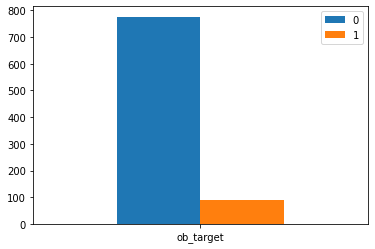

In [121]:
pd.DataFrame(y_train.value_counts()).T.plot.bar()
plt.xticks(rotation='horizontal')
plt.show()
# highly imblanced dataset which is usual for fraud detection

In [122]:
# importing the library that will help us balance the dataset
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

In [123]:
#tried scaling before applying SMOTE but did not help, so leaving it for now
# scaler=StandardScaler()
# X_train_scaled= scaler.fit_transform(X_train)
# X_test_scaled= scaler.transform(X_test)
# X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [124]:
list(enumerate(X_train.columns)) #getting the index of the columns, will need while applying smote

[(0, 'ib_var_1'),
 (1, 'ib_var_2'),
 (2, 'ib_var_3'),
 (3, 'ib_var_4'),
 (4, 'ib_var_5'),
 (5, 'ib_var_6'),
 (6, 'ib_var_7'),
 (7, 'ib_var_8'),
 (8, 'ib_var_11'),
 (9, 'ib_var_13'),
 (10, 'ib_var_14'),
 (11, 'ib_var_15'),
 (12, 'ib_var_16'),
 (13, 'ib_var_17'),
 (14, 'ib_var_18'),
 (15, 'ib_var_19'),
 (16, 'ib_var_20'),
 (17, 'ib_var_21'),
 (18, 'icn_var_22'),
 (19, 'icn_var_23'),
 (20, 'icn_var_24'),
 (21, 'ico_var_25'),
 (22, 'ico_var_26'),
 (23, 'ico_var_27'),
 (24, 'ico_var_28'),
 (25, 'ico_var_29'),
 (26, 'ico_var_30'),
 (27, 'ico_var_31'),
 (28, 'ico_var_32'),
 (29, 'ico_var_33'),
 (30, 'ico_var_34'),
 (31, 'ico_var_35'),
 (32, 'ico_var_36'),
 (33, 'ico_var_37'),
 (34, 'ico_var_38'),
 (35, 'ico_var_39'),
 (36, 'ico_var_40'),
 (37, 'ico_var_41'),
 (38, 'ico_var_42'),
 (39, 'ico_var_43'),
 (40, 'ico_var_44'),
 (41, 'ico_var_45'),
 (42, 'ico_var_46'),
 (43, 'ico_var_47'),
 (44, 'ico_var_48'),
 (45, 'ico_var_49'),
 (46, 'ico_var_50'),
 (47, 'ico_var_51'),
 (48, 'ico_var_52'),
 (49, '

In [125]:
smotenc = SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60],
# continuous_features= [61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77],
random_state = 101,
k_neighbors=5
)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)




In [126]:
# final check for shape and null values before we proceed

print(X_oversample.shape, X_test.shape, y_oversample.shape)
print(X_oversample.isnull().values.any(), X_test.isnull().values.any(), y_oversample.isnull().values.any())

(1552, 77) (2967, 77) (1552,)
False False False


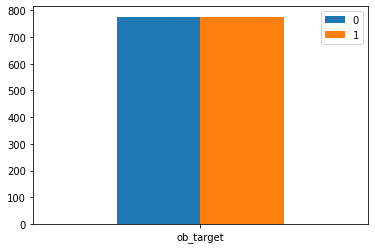

In [127]:
# we now have equal fraud and non fraud on our training set
pd.DataFrame(y_oversample.value_counts()).T.plot.bar()
plt.xticks(rotation='horizontal')
plt.show()

# 6. Final preprocessing using Column Transformations <a name=6></a>

In [128]:
#defining Categorial variables as nominal (OHE) and odinal (ordinal encoding) using scikit learn's columns transformer

ohe_cats=['ib_var_1', 'ib_var_2', 'ib_var_3', 'ib_var_4', 'ib_var_5', 'ib_var_6',
       'ib_var_7', 'ib_var_8','ib_var_11','ib_var_13', 'ib_var_14',
       'ib_var_15', 'ib_var_16', 'ib_var_17', 'ib_var_18', 'ib_var_19',
       'ib_var_20', 'ib_var_21', 'icn_var_22', 'icn_var_23', 'icn_var_24']
ord_cats= ['ico_var_25', 'ico_var_26', 'ico_var_27', 'ico_var_28', 'ico_var_29',
       'ico_var_30', 'ico_var_31', 'ico_var_32', 'ico_var_33', 'ico_var_34',
       'ico_var_35', 'ico_var_36', 'ico_var_37', 'ico_var_38', 'ico_var_39',
       'ico_var_40', 'ico_var_41', 'ico_var_42', 'ico_var_43', 'ico_var_44',
       'ico_var_45', 'ico_var_46', 'ico_var_47', 'ico_var_48', 'ico_var_49',
       'ico_var_50', 'ico_var_51', 'ico_var_52', 'ico_var_53', 'ico_var_54',
       'ico_var_55', 'ico_var_56', 'ico_var_57', 'ico_var_58', 'ico_var_59',
       'ico_var_60', 'ico_var_61', 'ico_var_62', 'ico_var_63', 'ico_var_64']


transformer = ColumnTransformer(transformers=[
    ('OHE',OneHotEncoder(sparse=False,drop='first'),ohe_cats),
    ('Ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ord_cats)],
     remainder='passthrough')

X_train_transformed=transformer.fit_transform(X_oversample)


In [129]:
# transforming the test set using the same fit as train
X_test_transformed= transformer.transform(X_test)

# 7. Modeling <a name=7></a>

In [130]:
grid = {"n_estimators": [1200, 1500, 1800,2000],
        "max_depth": [20,25,30,35],
        "max_features": ["sqrt"],
        "min_samples_split": [2,3,4,5, 6,7,8],
        "min_samples_leaf": [3,5,8,10,12]}
clf = RandomForestClassifier(n_jobs=-1, oob_score=True)

fold=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=100,
                            cv=fold,
                            verbose=1,
                            scoring='roc_auc')


fitted_model = rs_clf.fit(X_train_transformed, y_oversample)
print(" *******Results from Random Search********* " )
print("\n The best estimator across ALL searched params:\n", fitted_model.best_estimator_)
print("\n The best score across ALL searched params:\n", fitted_model.best_score_)
print("\n The best parameters across ALL searched params:\n", fitted_model.best_params_)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
 *******Results from Random Search********* 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=35, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=2000, n_jobs=-1, oob_score=True)

 The best score across ALL searched params:
 0.9738184180491873

 The best parameters across ALL searched params:
 {'n_estimators': 2000, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 35}


In [131]:
fitted_best_model=fitted_model.best_estimator_
pred_train = fitted_model.predict_proba(X_train_transformed)[:,1]
pred_test  = fitted_model.predict_proba(X_test_transformed)[:,1]


### 7.1 Model Evaluation <a name=7.1></a>

In [ ]:
print ("STEP 4: ASSESSING THE MODEL...")
# CALCULATING GINI PERFORMANCE ON DEVELOPMENT SAMPLE
from sklearn.metrics import roc_auc_score
gini_score = 2*roc_auc_score(y_oversample, pred_train)-1
print ("GINI DEVELOPMENT=", gini_score)

### 7.2 Feature Importance <a name=7.2></a>

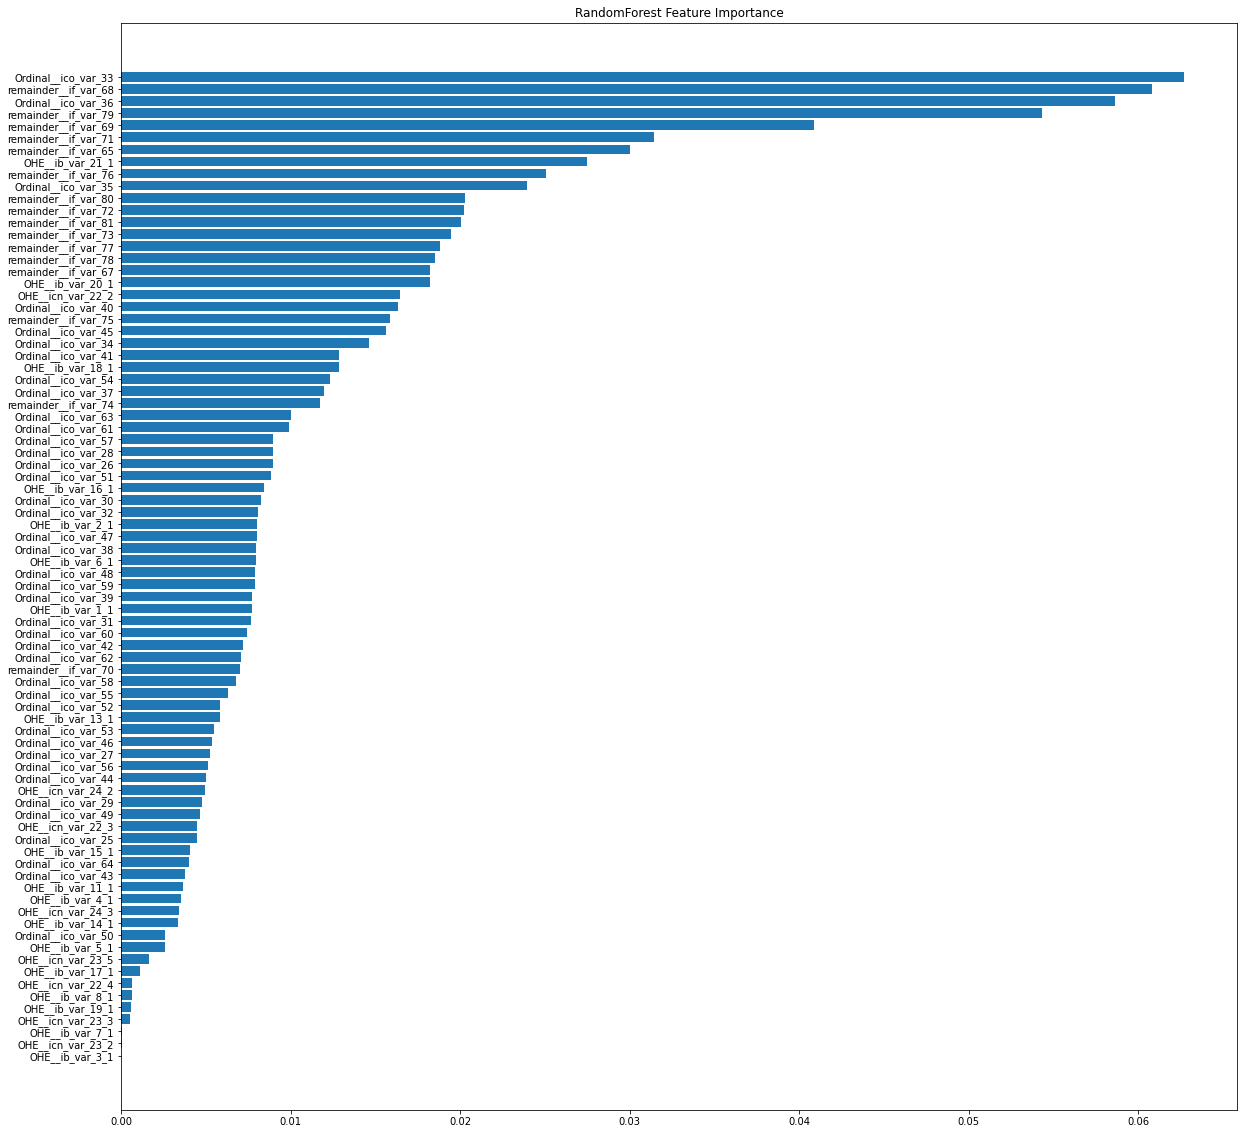

In [133]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20))
sorted_idx = fitted_model.best_estimator_.feature_importances_.argsort()
plt.barh(transformer.get_feature_names_out()[sorted_idx], fitted_model.best_estimator_.feature_importances_[sorted_idx])
plt.title("RandomForest Feature Importance");

# 8. Submission <a name=8></a>

In [134]:
print ("STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!")
import requests
from requests.auth import HTTPBasicAuth
df_test['pred'] = pred_test
df_test['id'] = df_test.iloc[:,0]
df_test_tosend = df_test[['id','pred']]

filename = "df_test_tosend.csv"
df_test_tosend.to_csv(filename, sep=',')
url = 'http://manoelutad.pythonanywhere.com/uploadpredictions/6aQ6IxU7Va'
files = {'file': (filename, open(filename, 'rb')),
         'ipynbcode': ('6aQ6IxU7Va.ipynb', open('6aQ6IxU7Va.ipynb', 'rb'))}


#rsub = requests.post(url, files=files)
rsub = requests.post(url, files=files, auth=HTTPBasicAuth("Mukhtadir", "sha256$FytsoS3z$9409ea358266da63eef86675641bc3a72dc9eb2a6287f9503599fd4b7d9b527e"))
resp_str = str(rsub.text)
print ("RESULT SUBMISSION: ", resp_str)

STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!
RESULT SUBMISSION:  ERROR: enviado despues de fecha de cierre


# 9. Other Models & Techniques <a name=9></a>
 - All of these were tried but did not give good results

### 9.1 XGBoost with Randomised Search CV <a name=9.1></a>

In [135]:
# Model and performance evaluation
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score

# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval


# Define the search space
param_grid = { 
    "n_estimators": [1600,1800,2000,2200],
    # Learning rate shrinks the weights to make the boosting process more conservative
    "learning_rate": [0.01, 0.1, 1],
    # Maximum depth of the tree, increasing it increases the model complexity.
    "max_depth": [18,21,23],
    # Gamma specifies the minimum loss reduction required to make a split.
    "gamma": [i/10.0 for i in range(0,3)],
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [i/10.0 for i in range(3,7)],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [1e-5, 1e-2],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [1e-2, 0.1, 1]}
# Set up score
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

xgboost= XGBClassifier(verbose=100, scale_pos_weight=9)


random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=50,
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=3)
# Fit grid search
random_result = random_search.fit(X_train_transformed, y_oversample)
# Print grid search summary
# random_result

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[14:07:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



In [136]:
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=21, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [137]:
fitted_best_model=random_result.best_estimator_
pred_train = fitted_best_model.predict_proba(X_train_transformed)[:,1]
pred_test  = fitted_best_model.predict_proba(X_test_transformed)[:,1]

### 9.2 XGBoost with Hyperopt (Bayesian Optimisation of Hyper parameters) <a name=9.2></a>

In [138]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
space = {
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.1),
    'n_estimators' : hp.choice('n_estimators', range(200, 2000, 100)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)
        }

def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree'],
                            )
    
    classifier.fit(X_train_transformed, y_oversample)

    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = X_train_transformed, y = y_oversample, cv = fold, scoring='roc_auc')
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print("Best: ", best)


# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = best['n_estimators'],
                            max_depth = best['max_depth'],
                            learning_rate = best['learning_rate'],
                            gamma = best['gamma'],
                            min_child_weight = best['min_child_weight'],
                            subsample = best['subsample'],
                            colsample_bytree = best['colsample_bytree'],
                            )

classifier.fit(X_train_transformed, y_oversample)

CrossValMean:                                                                   
0.9630224476378321                                                              
CrossValMean:                                                                   
0.9709250151557843                                                              
CrossValMean:                                                                   
0.962529493298724                                                               
CrossValMean:                                                                   
0.9553366861059168                                                              
CrossValMean:                                                                   
0.9685328916098146                                                              
CrossValMean:                                                                   
0.9686247513170589                                                              
CrossValMean:               

KeyboardInterrupt: 

In [ ]:
pred_train = classifier.predict_proba(X_train_transformed)[:,1]
pred_test  = classifier.predict_proba(X_test_transformed)[:,1]

### 9.3 Genetic Algorithm TPOT <a name=9.3></a>

In [ ]:
# %pip install tpot

In [ ]:
from tpot import TPOTClassifier

tpot_classifier = TPOTClassifier(generations=5, 
                        population_size=50, 
                        cv=5, 
                        scoring='roc_auc', 
                        verbosity=2, 
                        random_state=1, 
                        n_jobs=-1)

# this is specifically for Randomforest
# tpot_classifier = TPOTClassifier(generations= 5, population_size= 50, offspring_size= 12,
#                                  verbosity= 2, early_stop= 12,
#                                  config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
#                                  cv = fold, scoring = 'roc_auc')
tpot_classifier.fit(X_train_transformed, y_oversample)

In [ ]:
pred_train = tpot_classifier.predict_proba(X_train_transformed)[:,1]
pred_test  = tpot_classifier.predict_proba(X_test_transformed)[:,1]

# 10. Conclusion & Learnings <a name=10></a>
 - Our best model was random forest and the hyper parameters were tuned by using scikit learn's randomised search CV
 - Our best Gini score on the test set was 0.5366 while on train it was 1.0, our model was obviously overfitting but that is expected in Fraud Detection
 - SMOTE did help push up the score
 - Rest of the techniques did not give as good a score, reasons logged in the accompanying report